In [4]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dataset_cl = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [8]:
conda install -c conda-forge mlxtend 

Note: you may need to restart the kernel to use updated packages.




CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/conda-forge/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https//conda.anaconda.org/conda-forge/win-64'




In [10]:
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
te_cl=TransactionEncoder()
te_ary_cl=te_cl.fit(dataset_cl).transform(dataset_cl)    #Apply one-hot-encoding on our dataset
df_cl=pd.DataFrame(te_ary_cl, columns=te_cl.columns_)  #Creating a new DataFrame from our Numpy array
df_cl


,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [87]:
df_cl_copy=df_cl.copy()
df_cl_copy= df_cl_copy.astype(int)
df_cl_copy.head()

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,0,0,1,0,0,1,0,1,0,1,1,0
1,0,0,1,0,0,1,0,0,0,1,1,1
2,1,0,0,1,0,1,1,1,0,0,0,0
3,1,1,1,1,1,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,1,1,1,0,0


In [81]:
count_val=df_cl_copy.sum()
count_val
type(count_val)


pandas.core.series.Series

<AxesSubplot:>

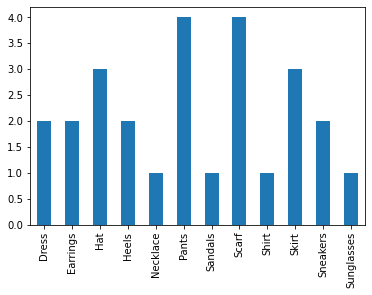

In [83]:
count_val.plot.bar()
#pandas below 0.17.0
count_val.plot(kind='bar')


Pants and Scraft are the most purchased items.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

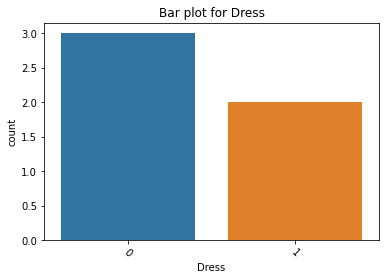

In [70]:
sns.countplot(x='Dress',data=df_cl_copy)
plt.title("Bar plot for Dress")
plt.xticks(rotation=-45)

In [84]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets_cl=apriori(df_cl, min_support=0.6, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets_cl


,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Skirt, Pants)"


In [12]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets_cl,metric="confidence",min_threshold=0.7) # associate itemsets with confidence over 70%.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


Confidence: After buying item X, what’s the probability of buying item Y?

After buying a Scarf, there is a high probability of buying Pants and vise versa (confidence=0.75).
After buying a Skirt, there is a high probability of buying Pants (confidence=1).

==> it is better to put Scarfs, Pants and Skirts next to each others

In [35]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets_cl,metric="lift",min_threshold=1.25)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


Lift : What’s the probability of buying items X and Y together rather than just buying item X

Lift{Skirt-->Pants}=1.25>1 ==> It’s more likely to buy Skirt and Pants together rather than each item alone.

We have to put Skirt and Pants together

In [48]:
df_MBO= pd.read_csv("Market_Basket_Optimisation.csv",header = None)
df_MBO.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
List_MBO=df_MBO.values.tolist()
te_MBO=TransactionEncoder()
#print(List_MBO)

from math import nan, isnan

#for item in List_MBO:
#    for x in List_MBO[item]:
#       if str(item,x) != 'nan':
#         new_list.append(item)
#print(new_list)


new_list = [[item for item in List_MBO ] for x in item if not(math.isnan(item[x]))== True]
 
print(new_list)

#List_MBO= List_MBO[~numpy.isnan(List_MBO)]
#print(List_MBO)
#te_ary_MBO=te_MBO.fit(df_MBO).transform(df_MBO)    #Apply one-hot-encoding on our dataset
#df_MBO=pd.DataFrame(te_ary_MBO, columns=te_MBO.columns_)  #Creating a new DataFrame from our Numpy array
#df_MBO

AttributeError: 'list' object has no attribute 'shape'

In [53]:
df_MBO.fillna('',axis=1,inplace=True)
df_MBO.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,,,,,,,,,,,,,,,,,
2,chutney,,,,,,,,,,,,,,,,,,,
3,turkey,avocado,,,,,,,,,,,,,,,,,,
4,mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,


In [54]:
df_list = df_MBO.to_numpy().tolist()
df_list
dataset = list()
for i in range(len(df_list)) :
    item = list()
    for j in df_list[i] :
        if pd.notna(j):
            item.append(j)
    dataset.append(item)

In [63]:
te_MBO = TransactionEncoder()
# Fit and transform our dataset which is a list of lists into an array of True and False.
tab_MBO = te_MBO.fit(dataset).transform(dataset)


In [86]:
df_MBO = pd.DataFrame(tab_MBO,columns=te_MBO.columns_)
df_MBO.head()
df_MBO.drop(columns=[''],axis=1,inplace=True)
df_MBO.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


<AxesSubplot:>

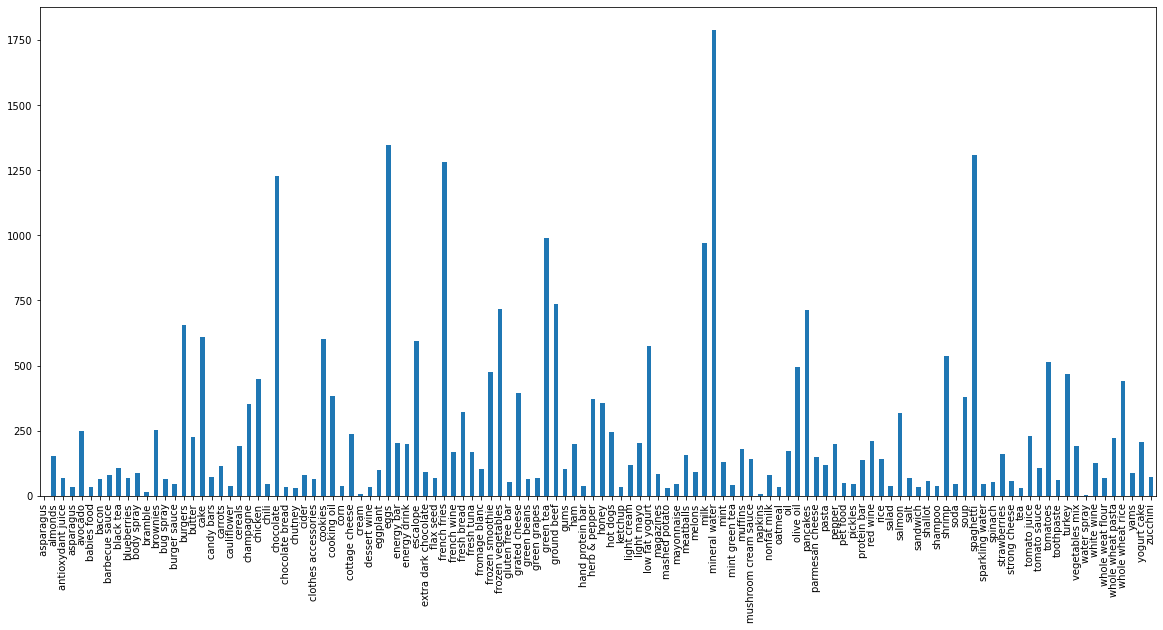

In [95]:
df_MBO_copy=df_MBO.copy()
df_MBO_copy.astype(int)
count_val_MBO=df_MBO_copy.sum()
plt.figure(figsize=(20,9))
count_val_MBO.plot.bar(width = 0.5)


The mineral water is the most purchased item, then eggs, spaghetti, french fries, chocolate

In [96]:
frequent_itemsets_MBO = apriori(df_MBO, min_support=0.5, use_colnames=True)
frequent_itemsets_MBO



,support,itemsets


In [97]:
frequent_itemsets_MBO = apriori(df_MBO, min_support=0.1, use_colnames=True)
frequent_itemsets_MBO

,support,itemsets
0,0.163845,(chocolate)
1,0.179709,(eggs)
2,0.170911,(french fries)
3,0.132116,(green tea)
4,0.129583,(milk)
5,0.238368,(mineral water)
6,0.174110,(spaghetti)


In [99]:
association_rules(frequent_itemsets_MBO,metric="confidence",min_threshold=0.02) # associate itemsets with confidence over 70%.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [62]:
association_rules(frequent_itemsets_MBO,metric="lift",min_threshold=0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [105]:
df_MBO_no_Water=df_MBO.copy()
del df_MBO_no_Water['mineral water']
frequent_itemsets_MBO_no_Water = apriori(df_MBO_no_Water, min_support=0.1, use_colnames=True)
frequent_itemsets_MBO_no_Water

,support,itemsets
0,0.163845,(chocolate)
1,0.179709,(eggs)
2,0.170911,(french fries)
3,0.132116,(green tea)
4,0.129583,(milk)
5,0.174110,(spaghetti)


In [106]:
association_rules(frequent_itemsets_MBO_no_Water,metric="confidence",min_threshold=0.02) # associate itemsets with confidence over 70%.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


I could not obtain the confidence and the lift, even though I lowered the threshold !!!! 
Consequently, I could not extract marketing strategy for the Market